In [1]:
import numpy as np
import subprocess
from IPython.display import clear_output
import pylab as pl

import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [20]:
# Go to the project folder
%cd ../src

time_command = "/usr/bin/time "
omp = "./density_omp.x "
mpi = "mpirun -np 4 ./density_mpi.x "

generator = "./generate_points.x "

programs = [omp, mpi]

/home/lettera/Desktop/FHPC final project/3D-density-estimation/src


In [17]:
def string_to_time(string):
    s = string.stderr.split()[2].decode("utf-8")

    min, rest = s.split(':')
    sec, rest = rest.split(".")
    cent = rest.split("e")[0]

    return float(min)*60 + float(sec) + float(cent) / 100

def grid_to_MB(N):
    print(f"{N**3 * 4 / 1e6} MB")

def timer(command, best_of_n = 3):
    best_time = np.inf
    for i in range(best_of_n):
        output = subprocess.run(command, shell = True, capture_output = True)
        time = string_to_time(output)
        if time < best_time:
            best_time = time
    
    return best_time

In [22]:
N = 512
all_n_points = np.linspace(1e5, 2e6, 20, dtype=int)

times_per_n_points = {omp: [], mpi: []}

for program in [omp, mpi]:
    for n_points in all_n_points:
        subprocess.run(generator + str(n_points), shell = True)
        R = 1. / n_points**(1/3)
        args = f"{N} {R} points.bin"
        command = time_command + program + args

        time = timer(command, 1)
        times_per_n_points[program].append(time)

        print("Done: ", n_points)
        clear_output(wait=True)

Done:  2000000


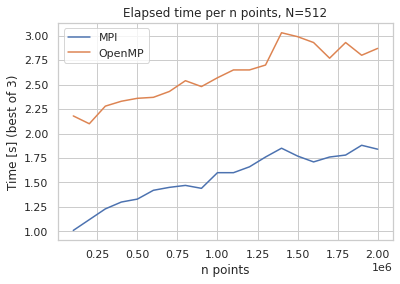

In [23]:
pl.plot(all_n_points, times_per_n_points[mpi], label="MPI")
pl.plot(all_n_points, times_per_n_points[omp], label="OpenMP")
pl.xlabel("n points")
pl.ylabel("Time [s] (best of 3)")
pl.title(f"Elapsed time per n points, N={N}")
pl.legend()

pl.savefig("n_points_linear.png", bbox_inches="tight", dpi=300)

In [24]:
grid_numbers = np.linspace(16, 512, 24, dtype=int)

times_per_grid_number = {omp: [], mpi: []}

n_points = 2**20
R = 0.05
subprocess.run(generator + str(n_points), shell = True)

for program in [omp, mpi]:
    for grid_number in grid_numbers:
        args = f"{grid_number} {R} points.bin"
        command = time_command + program + args
        time = timer(command, 1)
        times_per_grid_number[program].append(time)

        print("Done: ", grid_number)
        clear_output(wait=True)

Done:  512


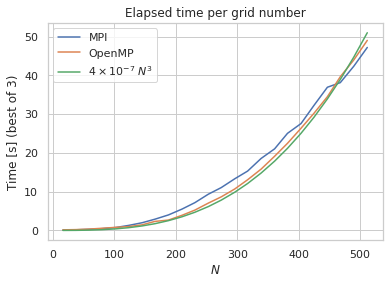

In [64]:
pl.plot(grid_numbers, times_per_grid_number[mpi], label="MPI")
pl.plot(grid_numbers, times_per_grid_number[omp], label="OpenMP")
pl.plot(grid_numbers, 3.8e-7*grid_numbers**3, label="$4 \\times 10^{-7} \; N^3$")
pl.xlabel("$N$")
pl.ylabel("Time [s] (best of 3)")
pl.title(f"Elapsed time per grid number")
pl.legend()

pl.savefig("grid_number_linear.png", bbox_inches="tight", dpi=300)

In [37]:
grid_numbers_log = np.logspace(5, 10, 12, base=2, dtype=int)

times_per_grid_number_log = {omp: [], mpi: []}

n_points = 2**20
R = 0.05
subprocess.run(generator + str(n_points), shell = True)

for program in [omp, mpi]:
    for grid_number in grid_numbers_log:
        args = f"{grid_number} {R} points.bin"
        command = time_command + program + args
        time = timer(command, 1)
        times_per_grid_number_log[program].append(time)

        print("Done: ", grid_number)
        clear_output(wait=True)

Done:  1024


In [44]:
program = "./density_serial.x "
grid_number = 512

args = f"{grid_number} {R} points.bin"
command = time_command + program + args
time = timer(command, 1)

print("Done: ", time)
clear_output(wait=True)

Done:  116.03


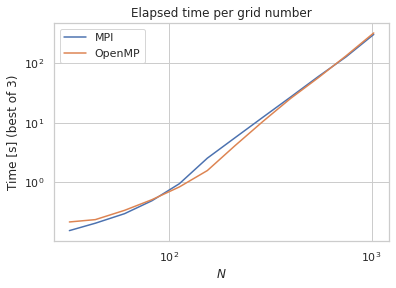

In [59]:
pl.loglog(grid_numbers_log, times_per_grid_number_log[mpi], label="MPI")
pl.plot(grid_numbers_log, times_per_grid_number_log[omp], label="OpenMP")
pl.xlabel("$N$")
pl.ylabel("Time [s] (best of 3)")
pl.title(f"Elapsed time per grid number")
pl.legend()

pl.savefig("grid_number_log.png", bbox_inches="tight", dpi=300)